In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
with open(f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stall-score.df.pickle',"rb") as fr: stalling_score = pickle.load(fr)
stalling_score['AA_codon'] = stalling_score['aa-asite']+' '+stalling_score['codon-asite']
stalling_score = stalling_score.replace(0, np.nan).dropna()

display(stalling_score)

,transcript_id,asite,reltostart-asite,codon-asite,aa-asite,D0a,D0b,D0c,D4a,D4b,D4c,D8a,D8b,D8c,AA_codon
6,ENSMUST00000000001.5,195,54,AUC,I,1.876404,1.591739,5.703044,2.955752,0.824691,1.796907,3.290640,1.739583,2.312308,I AUC
7,ENSMUST00000000001.5,198,57,GAC,D,1.876404,1.591739,0.991834,0.268705,1.237037,0.673840,0.658128,1.159722,0.770769,D GAC
9,ENSMUST00000000001.5,204,63,AAC,N,3.987360,1.326450,4.711210,5.642800,0.824691,2.470746,0.658128,0.579861,1.027692,N AAC
10,ENSMUST00000000001.5,213,72,GAG,E,3.049157,2.652899,3.471418,2.149638,2.474074,2.695360,1.974384,2.899306,1.798462,E GAG
13,ENSMUST00000000001.5,228,87,GCG,A,1.641854,1.326450,4.711210,0.806114,0.824691,2.695360,2.303448,2.899306,5.652308,A GCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024950,ENSMUST00000239525.1,10109,9978,GAG,E,7.105894,12.158446,6.512629,5.410881,3.658754,4.345818,3.622268,7.712703,1.497849,E GAG
1024957,ENSMUST00000239525.1,10139,10008,GAG,E,15.544144,9.210944,7.598067,13.527202,9.146886,14.775780,5.433403,5.141802,1.497849,E GAG
1024966,ENSMUST00000239525.1,10184,10053,AAA,K,2.664710,2.210627,3.527674,13.527202,8.232198,5.214981,16.300208,10.283604,23.965577,K AAA
1025016,ENSMUST00000239525.1,10442,10311,GAG,E,1.776474,2.579064,0.542719,3.607254,0.304896,0.869164,3.622268,10.283604,1.497849,E GAG


In [3]:
stalling_score_avg = stalling_score.copy()
for Cd in ['D0','D4','D8']:
    stalling_score_avg[Cd] = stalling_score_avg[[Cd+rep for rep in ['a','b','c']]].mean(axis=1)
stalling_score_avg = stalling_score_avg[['transcript_id','asite','reltostart-asite','codon-asite','aa-asite','D0','D4','D8']]

display(stalling_score_avg)

,transcript_id,asite,reltostart-asite,codon-asite,aa-asite,D0,D4,D8
6,ENSMUST00000000001.5,195,54,AUC,I,3.057063,1.859117,2.447510
7,ENSMUST00000000001.5,198,57,GAC,D,1.486659,0.726527,0.862873
9,ENSMUST00000000001.5,204,63,AAC,N,3.341673,2.979413,0.755227
10,ENSMUST00000000001.5,213,72,GAG,E,3.057825,2.439691,2.224050
13,ENSMUST00000000001.5,228,87,GCG,A,2.559838,1.442055,3.618354
...,...,...,...,...,...,...,...,...
1024950,ENSMUST00000239525.1,10109,9978,GAG,E,8.592323,4.471818,4.277607
1024957,ENSMUST00000239525.1,10139,10008,GAG,E,10.784385,12.483290,4.024351
1024966,ENSMUST00000239525.1,10184,10053,AAA,K,2.801004,8.991460,16.849796
1025016,ENSMUST00000239525.1,10442,10311,GAG,E,1.632752,1.593771,5.134574


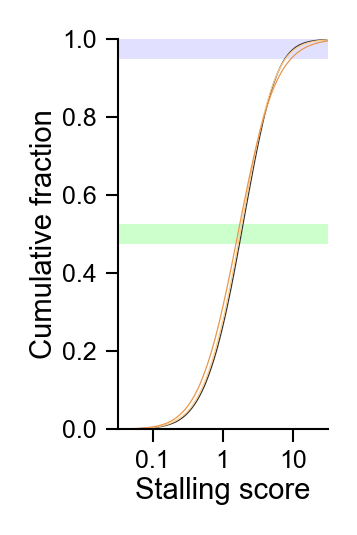

<Figure size 640x480 with 0 Axes>

In [13]:
sF = 1 # Size factor
wgap = 0
hgap = 0
nrow, ncol = 1, 1

width_ratios = [0.7]
height_ratios = [1.3]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)


# Stalling score cumulative curves
ax = fig.add_subplot(grid[0,0])
ax.axhspan(0.95, 1, 0, 1, color='#E1E1FF', lw=0)
ax.axhspan(0.475, 0.525, 0, 1, color='#CCFFCC', lw=0)
for Cd in ['D0','D4','D8']:
    ax.ecdf(np.log10(stalling_score_avg[Cd]), color={'D0':'#333333', 'D4':'#FFCC88', 'D8':'#E8974D'}[Cd], lw=0.3)

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(0,1)
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels([0.1, 1, 10])
ax.tick_params(width=0.5, length=3, pad=2)

ax.set_xlabel('Stalling score', labelpad=1)
ax.set_ylabel('Cumulative fraction', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


plt.savefig('adi_stalling-score_cumul.pdf', bbox_inches='tight')
plt.show()
plt.clf()